<a href="https://colab.research.google.com/github/Sela80/s/blob/main/Ensemble_de_donn%C3%A9es_sur_la_criminalit%C3%A9_et_la_s%C3%A9curit%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# √Ä propos de l'ensemble de donn√©es
Cet ensemble de donn√©es contient 1 000 rapports de crimes d√©taill√©s recueillis au cours des deux derni√®res ann√©es en zone urbaine. Chaque enregistrement comprend le type de crime, les coordonn√©es pr√©cises du lieu, la date et l'heure de l'incident, des informations sur le quartier et des donn√©es d√©mographiques sur la victime, telles que l'√¢ge, le sexe et l'origine ethnique. Des champs suppl√©mentaires permettent de savoir si une arme √©tait utilis√©e et si le crime a √©t√© signal√© √† la police. Ces donn√©es sont id√©ales pour √©laborer des mod√®les **pr√©dictifs afin d'identifier les foyers de criminalit√©**, d'am√©liorer les alertes de s√©curit√© publique et de soutenir les efforts de police de proximit√©.

# Objectif principal:
- Identifier les types de crimes les plus probables selon les caract√©ristiques d√©mographiques

* Identifier le type de crime dans un quartier donn√© √† une date et heure pr√©cises

* Identifions le genre , Groupe racial ou ethnique et √Çge de la victime au moment de l‚Äôincident

# 1 - Analyse exploratoire

In [1]:
#Importation des biblioth√®ques n√©cessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/shamimhasan8/crime-and-safety-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kouakougdonsela
Your Kaggle Key: ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
Dataset URL: https://www.kaggle.com/datasets/shamimhasan8/crime-and-safety-dataset


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19.4k/19.4k [00:00<00:00, 48.9MB/s]

In [4]:
# Charger les donn√©es
df = pd.read_csv('/content/crime-and-safety-dataset/crime_safety_dataset.csv')

In [5]:
# Afficher notre Dataset
df.head()

id        date      time crime_type          city state  \
0   1  2022-09-09  18:58:57   Homicide  Philadelphia    PA   
1   2  2022-07-10  12:10:59    Assault       Phoenix    AZ   
2   3  2024-12-31  09:26:12   Burglary   San Antonio    TX   
3   4  2024-04-12  23:17:28  Vandalism  Philadelphia    PA   
4   5  2023-07-19  04:49:39      Fraud   San Antonio    TX   

  location_description  victim_age victim_gender victim_race  
0        9916 Broadway          34          Male       Other  
1          6853 Oak St          13        Female       Black  
2       3760 Maple Ave          23          Male       Asian  
3         6781 Main St          36         Other       Asian  
4        3239 Broadway          26         Other       Other

In [6]:
#Informations sur databases
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   object
 4   city                  1000 non-null   object
 5   state                 1000 non-null   object
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   object
 9   victim_race           1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


On constate que 80% de nos donn√©es sont **Object**(	date,time,crime_type,	city,	state,	location_description,	victim_gender,	victim_race) et 20% **Int64**(id,victim_age)

In [7]:
# V√©rifier les valeurs manquantes
df.isna().sum()

id                      0
date                    0
time                    0
crime_type              0
city                    0
state                   0
location_description    0
victim_age              0
victim_gender           0
victim_race             0
dtype: int64

Pas de valeurs nulles

In [8]:
df.duplicated().sum()

np.int64(0)

Pas valeurs doublantes

In [9]:
df.describe().transpose()

count     mean         std   min     25%    50%     75%     max
id          1000.0  500.500  288.819436   1.0  250.75  500.5  750.25  1000.0
victim_age  1000.0   52.201   22.913831  12.0   33.00   53.0   72.00    90.0

Ce rapport statistique nous laisse savoir que la victime le pus √¢g√© est de 90 ans, moins √¢g√© 12 ans

In [13]:
df.nunique()

id                      1000
date                     772
time                     996
crime_type                10
city                      10
state                      6
location_description     988
victim_age                79
victim_gender              4
victim_race                5
dtype: int64

# Visualisons

*  **Identifions les types de crimes les plus probables selon les caract√©ristiques d√©mographiques √† travers la visualisation**



Verifions d'abord combien Type de crime commis

/tmp/ipython-input-1530837111.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




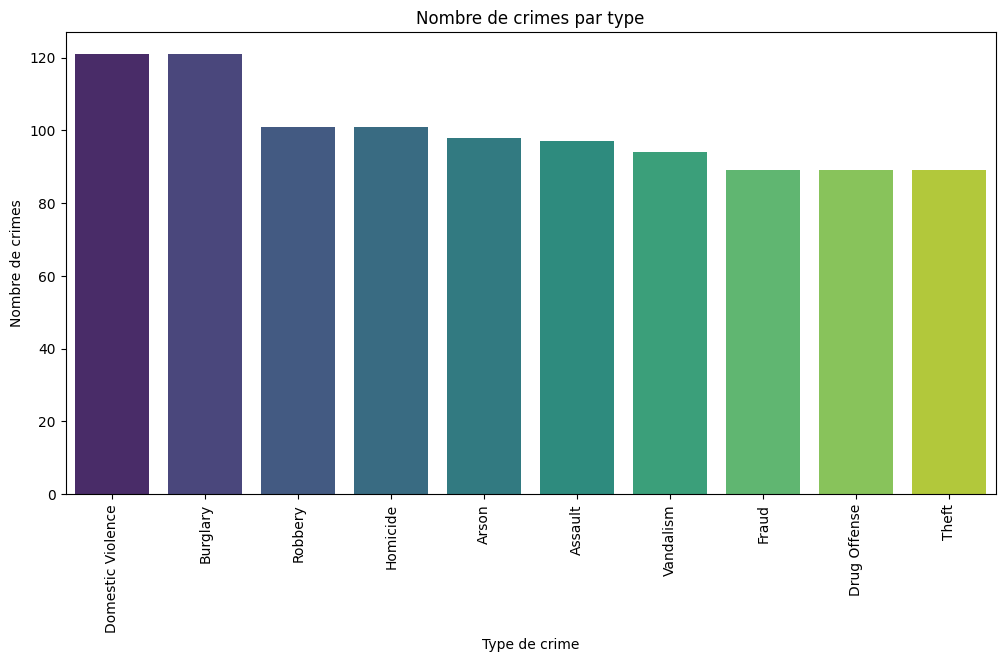

In [20]:
df['crime_type'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="crime_type", order=df["crime_type"].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Nombre de crimes par type")
plt.xlabel("Type de crime")
plt.ylabel("Nombre de crimes")
plt.show()

Ce graphique nous laisse supposer que les types de crimes les plus fr√©quents sont les crimes √† domicile (violence domestique), tandis que les moins fr√©quents sont les vols (theft).

Passons maintenant √† l‚Äô√©tude des villes o√π les crimes ont eu lieu, en examinant les diff√©rents types de crime.



/tmp/ipython-input-148147333.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




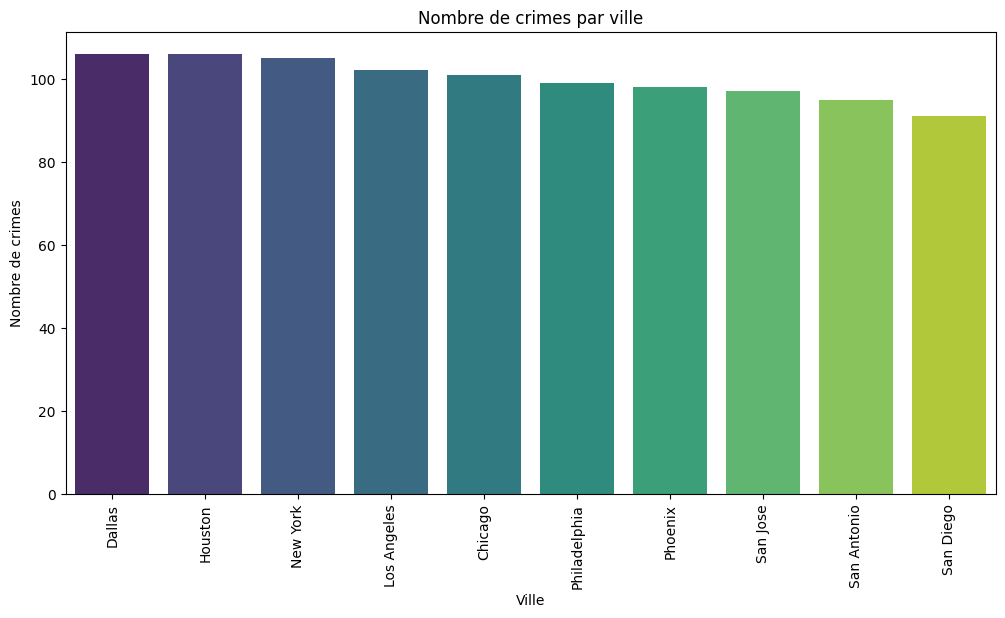

In [61]:
import plotly.express as px
distribution_crime_type_city = df[['crime_type','city']].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="city", order=df["city"].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Nombre de crimes par ville")
plt.xlabel("Ville")
plt.ylabel("Nombre de crimes")
plt.show()

Nous pouvons supposer, √† partir de ce graphique, que les villes o√π les diff√©rents types de crimes sont les plus fr√©quents sont Dallas et Houston. √Ä partir de New York, ces crimes diminuent progressivement jusqu‚Äô√† atteindre un niveau plus faible √† San Diego.

Passons maintenant √† l‚Äôanalyse des √âtats o√π les crimes ont √©t√© commis, selon leur type.

/tmp/ipython-input-2009936561.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Nombre de crimes par √©tat')

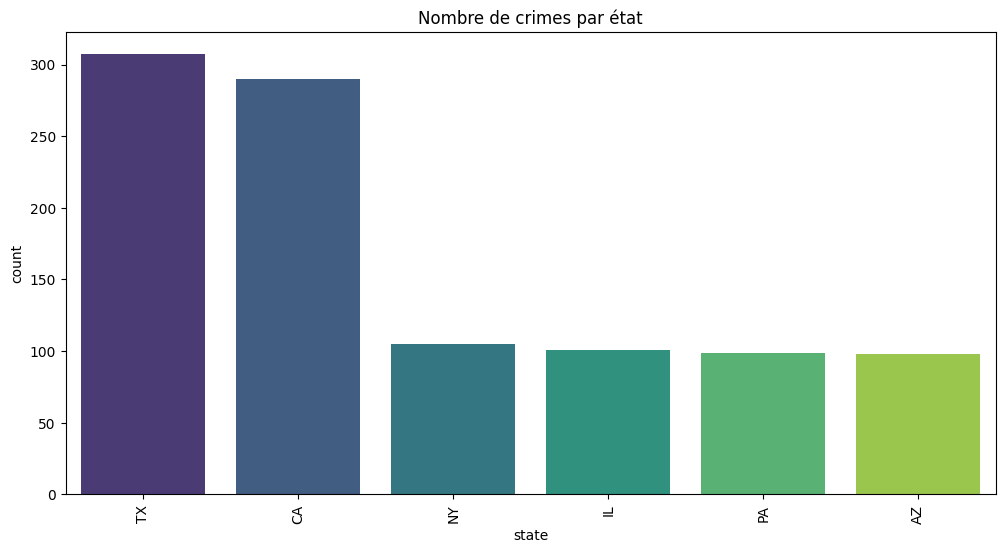

In [34]:
df[[ 'crime_type','state']].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="state", order=df["state"].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Nombre de crimes par √©tat")

Nous pouvons supposer, √† partir de ce graphique, que les √âtats o√π le ces diff√©rents types de crimes est le plus √©lev√© sont le Texas (TX) et la Californie (CA). √Ä l‚Äôinverse, les √âtats o√π l'on observe le moins de ces crimes sont New York (NY), l‚ÄôIllinois (IL), la Pennsylvanie (PA) et l‚ÄôArizona (AZ).


passons au nombre de crime par d√©tail du lieu,top(10) de la location_description

In [36]:
df[['crime_type', 'location_description']].value_counts().head(10)
fig=px.bar(df[['crime_type', 'location_description']].value_counts().head(10).reset_index(),
           x='location_description',
           y='count',
           color='crime_type',
           title='"Nombre de crimes par d√©tail du lieu')
fig.show()


Nous remarquons que la localit√© o√π les diff√©rents types de crimes sont les plus fr√©quents est le 9233 Main St, tandis que les autres localit√©s ‚Äî √† partir de 464 Oak St ‚Äî pr√©sentent un niveau de ces diff√©rents types de criminalit√© moins √©lev√©.





*   **Identifier le type de crime dans un quartier donn√© √† une date et heure pr√©cises**



In [40]:
crime_counts_by_date_type = df[['crime_type', 'date']].value_counts().head(10).reset_index()
fig = px.pie(crime_counts_by_date_type,
             values='count',
             names='date',
             color='crime_type',
             title='typs de crimes par date ')
fig.show()

Nous remarquons que:

 les m√™mes types de crimes se font √† chaque date




 Jettons un coup d'≈ìil sur les horaires

In [44]:
df[['crime_type','time']].value_counts().head(10)
fig=px.bar(df[['crime_type','time']].value_counts().head(10).reset_index(),
           x='time',
           y='count',
           color='crime_type',
           title='type de crimes par heure')
fig.show()

Nous pouvons supposer que
les m√™mes types de crimes se font √† chaque heure

* **Identifions le genre , Groupe racial ou ethnique et √Çge de la victime au moment de l‚Äôincident**

In [49]:
crime_counts_by_gender = df[['crime_type', 'victim_age']].value_counts().head(10).reset_index()
fig = px.pie(crime_counts_by_gender,
             values='count',
             names='victim_age',
             color='crime_type',
             title='Type de crimes par genre')
fig.show()

Nous remarquons que les diff√©rents types de crimes affectent principalement 29,49‚ÄØ% des personnes √¢g√©es de 40 ans, suivies de 11,8‚ÄØ% des personnes √¢g√©es de 44 ans, tandis que les autres tranches d‚Äô√¢ge sont touch√©es √† parts √©gales (9,8‚ÄØ%).

/tmp/ipython-input-3685819276.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




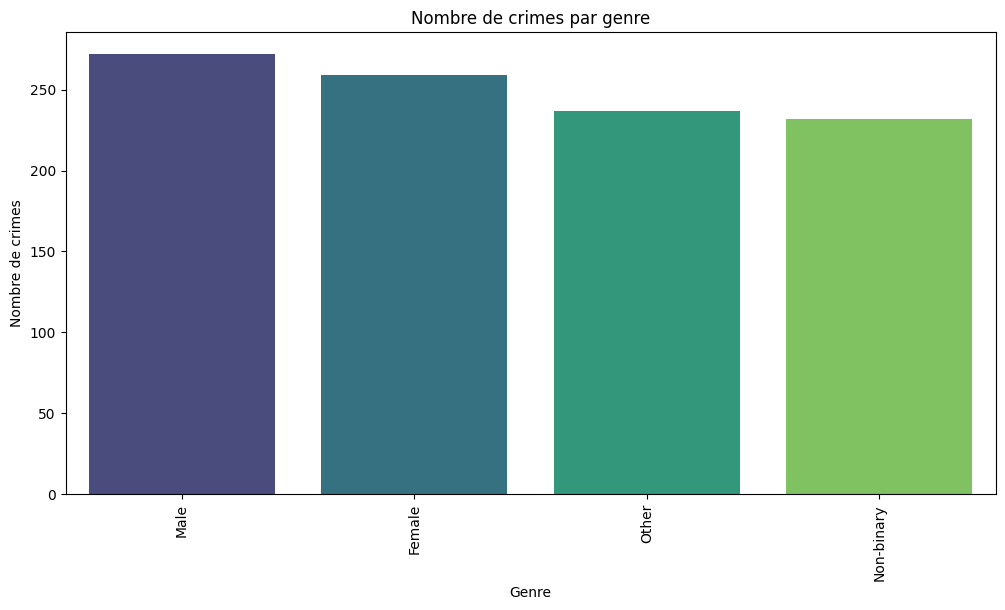

In [59]:
df[['crime_type','victim_gender']].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="victim_gender", order=df["victim_gender"].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Nombre de crimes par genre")
plt.xlabel("Genre")
plt.ylabel("Nombre de crimes")
plt.show()

Nous remarquons que les diff√©rents types de crimes touchent principalement les gar√ßons, suivis des femmes. Le taux diminue ensuite progressivement pour les personnes de genre autres et inconnu, bien que ce niveau reste relativement √©lev√©.

/tmp/ipython-input-1771092360.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




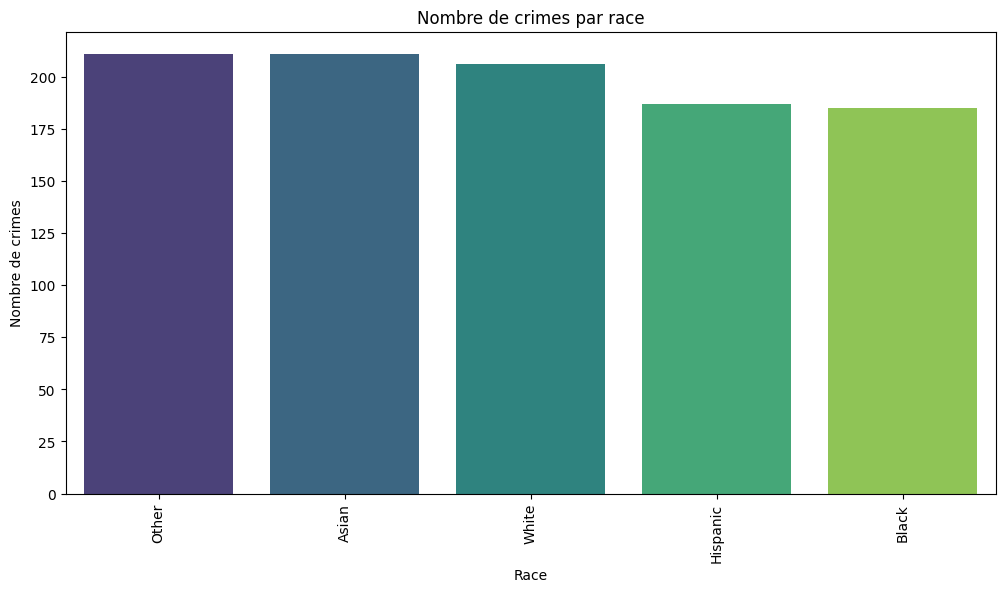

In [60]:
df[['crime_type','victim_race']].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="victim_race", order=df["victim_race"].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Nombre de crimes par race")
plt.xlabel("Race")
plt.ylabel("Nombre de crimes")
plt.show()

Nous remarquons que ces diff√©rents types de crimes touchent principalement les personnes des groupes ‚ÄúOther‚Äù et ‚ÄúAsian‚Äù. En comparaison, les autres groupes raciaux ‚Äî notamment White, Hispanic et Black ‚Äî sont moins concern√©s.


# R√©sum√© des Observations:

1. Types de Crimes Fr√©quents :

Les crimes √† domicile (violence domestique) sont les plus fr√©quents, tandis que les vols sont moins courants.

2. Villes Impact√©es :

 Dallas et Houston pr√©sentent les taux les plus √©lev√©s de crimes, avec une diminution progressive vers New York et San Diego.

3. √âtats Affect√©s :

 Le Texas et la Californie affichent les taux les plus √©lev√©s de criminalit√©, tandis que New York, l‚ÄôIllinois, la Pennsylvanie et l‚ÄôArizona sont parmi les moins touch√©s.

4. Localit√©s :

 La rue 9233 Main St est la plus touch√©e par diff√©rents types de crimes, contrairement √† d'autres localit√©s comme 464 Oak St.

5. Temporalit√© des Crimes :

 Les m√™mes types de crimes se produisent r√©guli√®rement √† chaque date et heure.

6. D√©mographie :

 Les personnes √¢g√©es de 40 ans sont les plus touch√©es (29,49 %), suivies par celles de 44 ans (11,8 %), tandis que les autres tranches d‚Äô√¢ge sont affect√©es de mani√®re √©gale (9,8 %).

7. Genre :

 Les gar√ßons sont les plus touch√©s, suivis des femmes, avec un taux plus faible pour les personnes de genre autre ou inconnu.

8. Origine Ethnique :

 Les groupes ‚ÄúOther‚Äù et ‚ÄúAsian‚Äù sont les plus concern√©s par la criminalit√©, tandis que les groupes White, Hispanic et Black sont moins touch√©s.

#Suggestions pour Am√©liorer la S√©curit√© Publique:

* Alertes Cibl√©es : D√©velopper un syst√®me d'alerte qui informe en temps r√©el les citoyens des types de crimes fr√©quents dans leur r√©gion, en utilisant des donn√©es d√©mographiques et g√©ographiques.

* Renforcement de la Police de Proximit√© :

 Augmenter la pr√©sence polici√®re dans les quartiers les plus touch√©s, notamment √† Dallas, Houston et dans des localit√©s sp√©cifiques comme 9233 Main St.

* √âducation et Sensibilisation :

 Lancer des campagnes de sensibilisation sur la violence domestique et d'autres crimes, en ciblant sp√©cifiquement les groupes d'√¢ge et de genre les plus touch√©s.

* Collaboration Communautaire :

 Impliquer les communaut√©s locales dans des initiatives de s√©curit√©, favorisant des liens entre les citoyens et la police pour une meilleure communication.

* Analyse des Donn√©es :

 Utiliser des analyses de donn√©es pour identifier les tendances criminelles et ajuster les strat√©gies de s√©curit√© publique en cons√©quence.

* Programmes de Pr√©vention :

 Mettre en place des programmes de pr√©vention ciblant les jeunes et les groupes vuln√©rables, afin de r√©duire la criminalit√© √† la source.

**A BIENT√îT üíõ**